11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


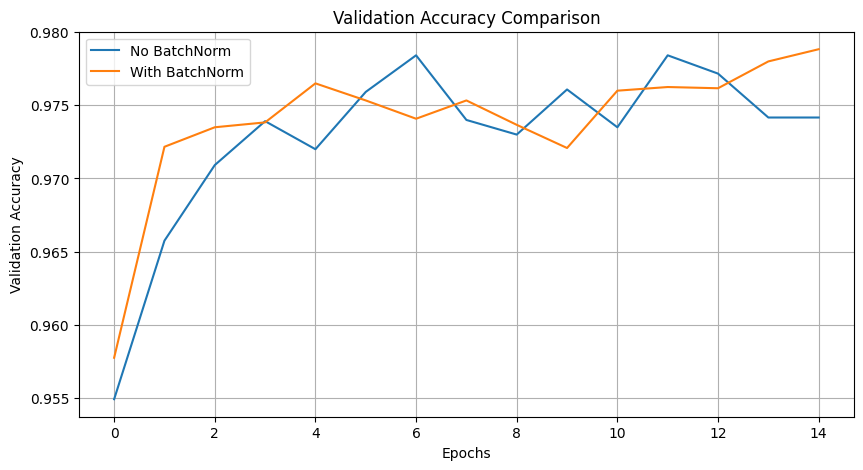

In [ ]:
# 06_batch_normalization.ipynb

# 📌 Objective: Compare model performance with and without Batch Normalization

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# ✅ Load and normalize dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# ✅ Model without BatchNorm
def build_model_no_bn():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(784,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ✅ Model with BatchNorm
def build_model_with_bn():
    model = keras.Sequential([
        layers.Dense(256, input_shape=(784,)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ✅ Train both models
model_no_bn = build_model_no_bn()
model_bn = build_model_with_bn()

history_no_bn = model_no_bn.fit(x_train, y_train, epochs=15, batch_size=128,
                                validation_split=0.2, verbose=0)

history_bn = model_bn.fit(x_train, y_train, epochs=15, batch_size=128,
                          validation_split=0.2, verbose=0)

# ✅ Plot comparison
def plot_history_comparison(hist1, hist2, label1='No BatchNorm', label2='With BatchNorm'):
    plt.figure(figsize=(10, 5))
    plt.plot(hist1.history['val_accuracy'], label=label1)
    plt.plot(hist2.history['val_accuracy'], label=label2)
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history_comparison(history_no_bn, history_bn)